<a href="https://colab.research.google.com/github/fedhere/MLPNS2021/blob/main/NNDL/CNNgalaxies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:
from tensorflow import keras
import pylab as pl

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/My\ Drive/MLPNS2021

/content/drive/My Drive/MLPNS2021


In [7]:
!ls

 10802534_761689917241346_821292660_n.jpg
 all_ones_benchmark.zip
 all_zeros_benchmark.zip
 central_pixel_benchmark.zip
 country_pop_clean.csv
 country_pop.csv
 country_pop_final.csv
 example_DR10.tar.gz
 galimgs.npy
 grb050525A.csv
 healthcare-dataset-stroke-data.csv
 higgsb
 HiggsBosonCompetition_AMSMetric_rev1.py
 images_test_rev1.zip
 images_training_rev1
 images_training_rev1.zip
 kaggle.json
 kalbar_drone_190113-768x512.jpg
 logs
 Madrid.jpg
 NYC_Women_s_Resource_Network_Database.csv
 random_submission.zip
 spm
 spm-20210427T111354Z-001.zip
'SP.POP.TOTL?downloadformat=excel'
'SP.POP.TOTL?downloadformat=excel.1'
'SP.POP.TOTL?downloadformat=excel.2'
'SP.POP.TOTL?downloadformat=excel.3'
'SP.POP.TOTL?downloadformat=excel.4'
'SP.POP.TOTL?downloadformat=excel.5'
 stroke-prediction-dataset.zip
 test.csv
 test.zip
 training.csv
 training_solutions_rev1.csv
 training_solutions_rev1.zip
 training.zip


In [8]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


In [9]:
!kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

In [ ]:
!unzip images_training_rev1.zip

In [1]:
#this takes a long time **the first time around**
!ls images_training_rev1

ls: cannot access 'images_training_rev1': No such file or directory


In [ ]:
!unzip training_solutions_rev1.zip

Archive:  training_solutions_rev1.zip
replace training_solutions_rev1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
import pandas as pd
training_labels = pd.read_csv("training_solutions_rev1.csv")

In [13]:
import pylab as pl
import cv2
import numpy as np

In [ ]:
img = np.asarray(cv2.imread("images_training_rev1/313205.jpg"))
pl.imshow(img);

In [ ]:
import glob
ims = np.zeros([1000, img.shape[0], img.shape[1], img.shape[2]], dtype=np.uint8)
for i,im in enumerate(glob.glob("images_training_rev1/*")[:1000]):
  if i%10 == 0:
    print ("index", i, end="\r", flush=True)
  ims[i] = np.asarray( cv2.imread(im))


In [ ]:
ims.shape

(1000, 424, 424, 3)

In [ ]:
training_labels

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027226,0.000000,0.027226,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,0.260804,0.000000,0.126152,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000,0.059207,0.0,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,0.045378,0.053406,0.000000,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,0.257128,0.347328,0.055958,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000,0.116962,0.0,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,0.000000,0.227114,0.545764,0.090673,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000,0.045450,0.0,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


# I am going to modify the current 18 probabilistic labels to obtain 4 labels that classify galaxies as :
#  spiral, 
# elliptical
# irregular
# not-a-galaxy

In [ ]:
nga = training_labels["Class1.3"]
spi = training_labels[["Class5.1", "Class5.2", "Class5.3", "Class5.4"]].max(axis=1)
ell = training_labels["Class6.2"]
irr = training_labels[["Class8.1", "Class8.2", "Class8.3", "Class8.4", "Class8.5", "Class8.6", "Class8.7"]].max(axis=1)
training_labels2 = pd.DataFrame({"nga": nga, "spi":spi, "ell":ell, "irr":irr})

In [ ]:
training_labels2

,nga,spi,ell,irr
0,0.000000,0.512101,0.945547,0.027226
1,0.009222,0.236781,0.810851,0.140353
2,0.056931,0.117790,1.000000,0.000000
3,0.068059,0.125280,0.679602,0.128159
4,0.066161,0.000000,0.970617,0.029383
...,...,...,...,...
61573,0.000000,0.260804,0.754266,0.175454
61574,0.000000,0.053406,0.872356,0.062095
61575,0.019783,0.347328,0.160814,0.604214
61576,0.000000,0.545764,0.136000,0.500256


In [ ]:
newclass = [np.where(training_labels2.iloc[i] == np.max(training_labels2.iloc[i]))[0][0] for i in range(len(training_labels2))]

In [ ]:
newclass

[2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,


# split a 1000 galaxies dataset into train-test with a proportion of 2-1. Note that 1000 object is a critically small dataset for DNN!

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ims, np.array(newclass[:1000]), test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(670, 424, 424, 3)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


In [ ]:
x_train.shape

In [ ]:
batch_size = 128
num_classes = 4
epochs = 50
input_shape = ims[0].shape

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [ ]:
from keras.optimizers import adam

# Set Optimizer
opt = adam(lr=0.001, decay=1e-6)

In [ ]:
model = Sequential()
model.add(Conv2D........

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback, EarlyStopping

patience = EarlyStopping(patience=5)
filepath = "galcheckpoints/cnn-improvement-{epoch:02d}-{loss:.4f}.hd5" 
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')

In [ ]:
# you can skip this and load the saved model
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_split=0.2,
                    batch_size=batch_size, verbose=1,
                    callbacks=[patience])#, checkpoint])

In [ ]:
model.fit(X_train, ytrain, epochs=epochs)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

In [ ]:
score = model.evaluate(X_test, y_test)


In [ ]:
score

In [ ]:
from scipy import ndimage, misc
newimg = np.zeros([1000*5, img.shape[0], img.shape[1], img.shape[2]], 
                  dtype=np.uint8)
np.random.seed(123)
for i in range(len(ims)):
  angles = np.random.rand(4) *   180
  newimg[i*5] = ims[i].copy()
  for j,a in enumerate(angles):

    newimg[i*5+1+j] = ndimage.rotate(newimg[i*5], a, 
                                         reshape=False, mode='mirror')



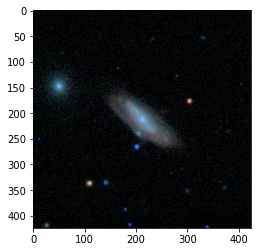

In [ ]:
pl.imshow(ims[0])

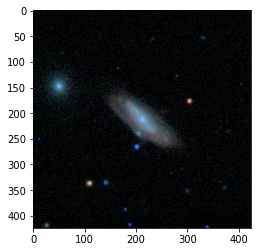

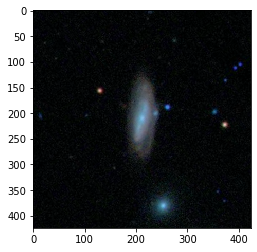

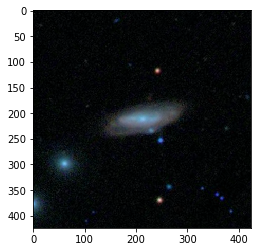

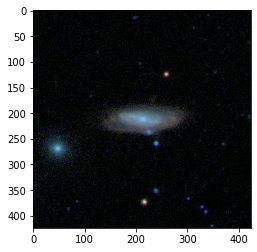

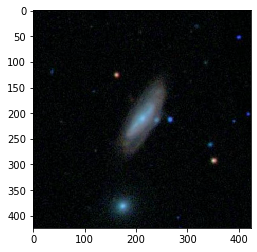

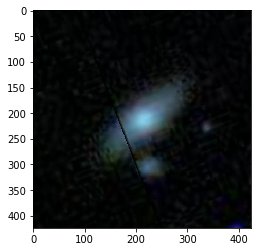

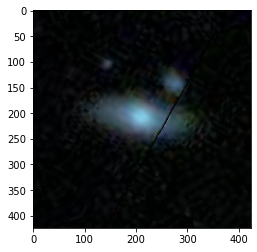

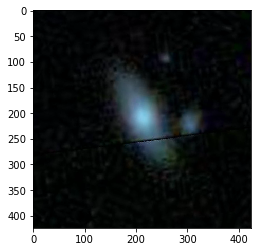

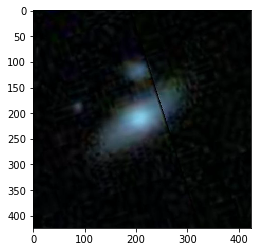

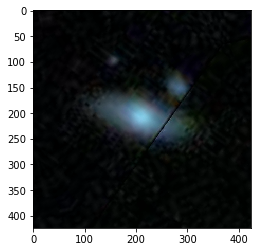

In [ ]:

for i in range (10):
  pl.imshow(newimg[i])
  pl.show()

in a look like the one above, take each image and rotate if by a random angle, **but also change its contrast by a random amount**. see the example below. choose small contrast changes if you want your images to remain realistic

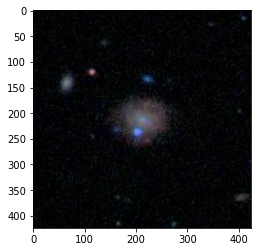

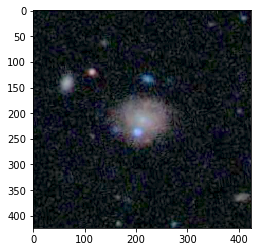

In [ ]:
fig = pl.figure()
# a power < 1 (here 0.2) lowers the contrast
imgnew = ims[10].astype(float)**0.6

#normalize: reset range to 0-255
imgnew *= 255 / imgnew.max()
imgnew = imgnew.astype(np.uint8)

pl.imshow(ims[10])

fig = pl.figure()
pl.imshow(imgnew)

